In [176]:
#importing Packages
import pandas as pd
import numpy as np
import math
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline



In [200]:
#importing clean datasets
normal_transactions=pd.read_csv('clean_data/normal_transaction.csv')
offer_success=pd.read_csv('clean_data/offer_success.csv')
waste_offer_transaction=pd.read_csv('clean_data/waste_offer_transaction.csv')
waste_offer=pd.read_csv('clean_data/waste_offer.csv')
profile_amount=pd.read_csv('clean_data/profile_amount.csv')
transaction_df=pd.read_csv('clean_data/transaction_df.csv')

In [202]:
normal_transactions=normal_transactions.drop(columns=['Unnamed: 0'])
offer_success=offer_success.drop(columns=['Unnamed: 0'])
waste_offer=waste_offer.drop(columns=['Unnamed: 0'])
waste_offer_transaction=waste_offer_transaction.drop(columns=['Unnamed: 0'])
profile_amount=profile_amount.drop(columns=['Unnamed: 0'])
transaction_df=transaction_df.drop(columns=['Unnamed: 0'])

## Let's Start with Relevant Business Question to Answer with help of this project
* Most successful kinds of offers in BOGO, Discount and Informational, since multiple types of each offer were tried
* Customers who are not at all affected by offers and should be stop sending offers
* Which is the most succesful medium for offer 
* Who are the Most Accurate Starbucks Customer by (AGE and GENDER)

In [178]:
offer_details=offer_success.groupby(['offer_id','offer_type'])['amount'].sum()
offer_details=offer_details.reset_index(name='amount')

In [179]:
offer_details.head(10)

,offer_id,offer_type,amount
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,39153.83
1,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,74694.19
2,2906b810c7d4411798c6938adc9daaa5,discount,50052.63
3,3f207df678b143eea3cee63160fa8bed,informational,69257.32
4,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,68280.75
5,5a8bc65990b245e5a138643cd4eb9837,informational,90953.59
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,43800.52
7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,67886.34
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,69764.99
9,fafdcd668e3743c1bb461111dcafc2a4,discount,80929.36


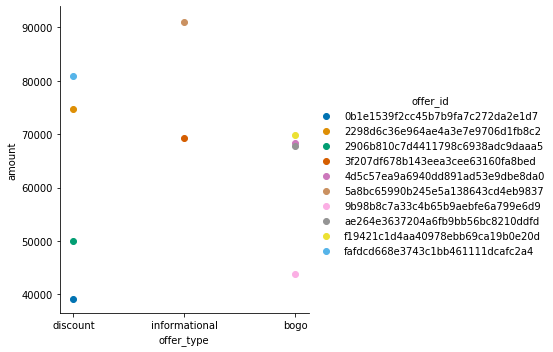

In [180]:
g=sns.FacetGrid(data=offer_details, hue='offer_id',height=5, palette='colorblind')
g.map(plt.scatter,'offer_type', 'amount')
g.add_legend();

### ** RESULT ** Most Succesful Offer Id's in Each Offer type:
* **Discount**: fafdcd668e3743c1bb461111dcafc2a4
* **Bogo**: f19421c1d4aa40978ebb69ca19b0e20d
* **Informational**: 5a8bc65990b245e5a138643cd4eb9837

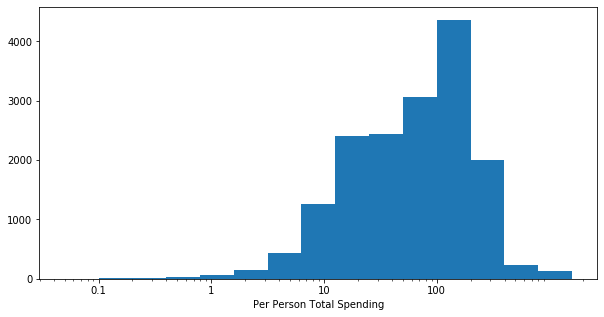

In [181]:
plt.figure(figsize=(10,5))
bins= 10 ** np.arange(-1.3,3.2+0.3,0.3)
ticks=[0.1,1,10,100]
labels={'{}'.format(v) for v in ticks}
plt.hist(data=profile_amount, x='amount', bins=bins);
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Per Person Total Spending');

In [182]:
profile_amount['amount'].median()

72.41

In [183]:
profile_amount.head()

,Unnamed: 0,gender,age,person,became_member_on,income,amount
0,0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,20.40
1,1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,77.01
2,2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,14.30
3,3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,159.27
4,4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,4.65


### ** Result ** The Median Amount Spent by People on Starbucks is USD 72.41 but the majority of people have spend around USD 100 -250 since being a member

In [184]:
profile_amount['age_range']=pd.cut((profile_amount.dropna(subset=['age'])['age']).astype('int'),bins=10, precision=0)

In [185]:
profile_amount.head()

,gender,age,person,became_member_on,income,amount,age_range
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,20.40,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,77.01,"(51.0, 60.0]"
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,14.30,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,159.27,"(68.0, 76.0]"
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,4.65,NaN


In [197]:
best_customers= profile_amount.groupby(['age_range','gender'])['amount'].sum()
best_customers=best_customers.reset_index(name='amount')

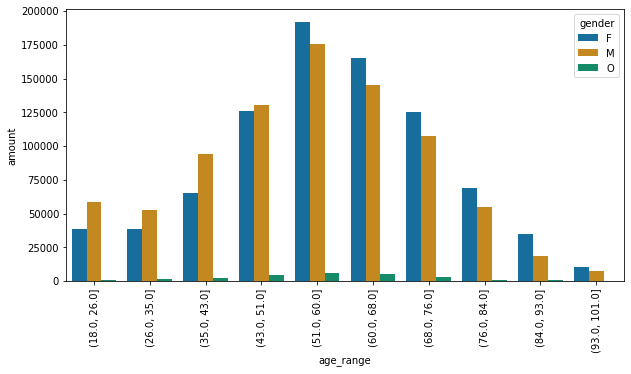

In [198]:
plt.figure(figsize=[10,5])
sns.barplot(x='age_range',y='amount', data=best_customers, hue='gender', palette='colorblind', ci=0)
plt.xticks(rotation=90);

### ** RESULT ** This Visualisation Clearly Shows that
* 'FEMALE' of 51-60 years of age are the most spending customers of starbucks.
* 51-60 years of age are the most spending Male customers of starbucks.

In [208]:
offer_success['type']='success'

In [206]:
waste_offer['type']='fail'

In [234]:
all_offers_df= offer_success.append(waste_offer)

In [235]:
all_offers_df.head()

,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,offer_completed,offer_id,offer_received,offer_type,offer_view,person,reward,time_completed,time_start,time_view,total,time_validity,amount,type
0,1.0,1.0,0.0,1.0,5.0,168.0,4.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,bogo,2.0,78afa995795e4d85b5d9ceeca43f5fef,5.0,132.0,0.0,6.0,7.0,168.0,19.89,success
1,1.0,1.0,1.0,1.0,5.0,120.0,4.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0,bogo,2.0,389bc3fa690240e798340f5a15918d5c,5.0,60.0,0.0,0.0,7.0,120.0,9.54,success
2,1.0,1.0,1.0,0.0,10.0,168.0,4.0,ae264e3637204a6fb9bb56bc8210ddfd,1.0,bogo,2.0,4b0da7e80e5945209a1fdddfe813dbe0,10.0,510.0,0.0,102.0,7.0,168.0,31.05,success
3,1.0,0.0,0.0,1.0,20.0,240.0,4.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,discount,2.0,d53717f5400c4e84affdaeda9dd926b3,5.0,30.0,0.0,30.0,7.0,240.0,339.69,success
4,1.0,1.0,1.0,1.0,10.0,240.0,4.0,fafdcd668e3743c1bb461111dcafc2a4,1.0,discount,2.0,f806632c011441378d4646567f357a21,2.0,126.0,0.0,18.0,7.0,240.0,28.29,success


In [252]:
a=all_offers_df.groupby('person')['type'].count()
a=a.reset_index(name='total')

In [259]:
a.shape, b.shape

((16982, 2), (13379, 2))

In [265]:
b = all_offers_df[all_offers_df['type']=='fail'].groupby('person')['type'].count()
b=b.reset_index(name='failed')

In [267]:
a= a.merge(b, on=['person'], how='left').fillna(0)

In [269]:
## Creating a Offer failure percentage column
a['fail_percentage']=(a['failed']/a['total'])*100

In [285]:
# Creating list of all the Id's of User who responded perfectly to all the offers
all_offers_success=(a[a['fail_percentage']==0]['person']).to_list()

In [286]:
# Creating list of all the Id's of User who didn't respond to any offer at all
all_offers_failed=(a[a['fail_percentage']==100]['person']).to_list()

   ### ** RESULT ** 'all_offers_success' & 'all_offer_failed' is the list of user accounts on which the company needs to take strategic decisions to continue sending the offers of stop

In [287]:
offer_success.head()

,channel_email,channel_mobile,channel_social,channel_web,difficulty,duration,offer_completed,offer_id,offer_received,offer_type,offer_view,person,reward,time_completed,time_start,time_view,total,time_validity,amount,type
0,1.0,1.0,0.0,1.0,5.0,168.0,4.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,bogo,2.0,78afa995795e4d85b5d9ceeca43f5fef,5.0,132.0,0.0,6.0,7.0,168.0,19.89,success
1,1.0,1.0,1.0,1.0,5.0,120.0,4.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0,bogo,2.0,389bc3fa690240e798340f5a15918d5c,5.0,60.0,0.0,0.0,7.0,120.0,9.54,success
2,1.0,1.0,1.0,0.0,10.0,168.0,4.0,ae264e3637204a6fb9bb56bc8210ddfd,1.0,bogo,2.0,4b0da7e80e5945209a1fdddfe813dbe0,10.0,510.0,0.0,102.0,7.0,168.0,31.05,success
3,1.0,0.0,0.0,1.0,20.0,240.0,4.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,discount,2.0,d53717f5400c4e84affdaeda9dd926b3,5.0,30.0,0.0,30.0,7.0,240.0,339.69,success
4,1.0,1.0,1.0,1.0,10.0,240.0,4.0,fafdcd668e3743c1bb461111dcafc2a4,1.0,discount,2.0,f806632c011441378d4646567f357a21,2.0,126.0,0.0,18.0,7.0,240.0,28.29,success


In [318]:
params=['amount', 'difficulty','time_validity', 'time_view', 'reward']

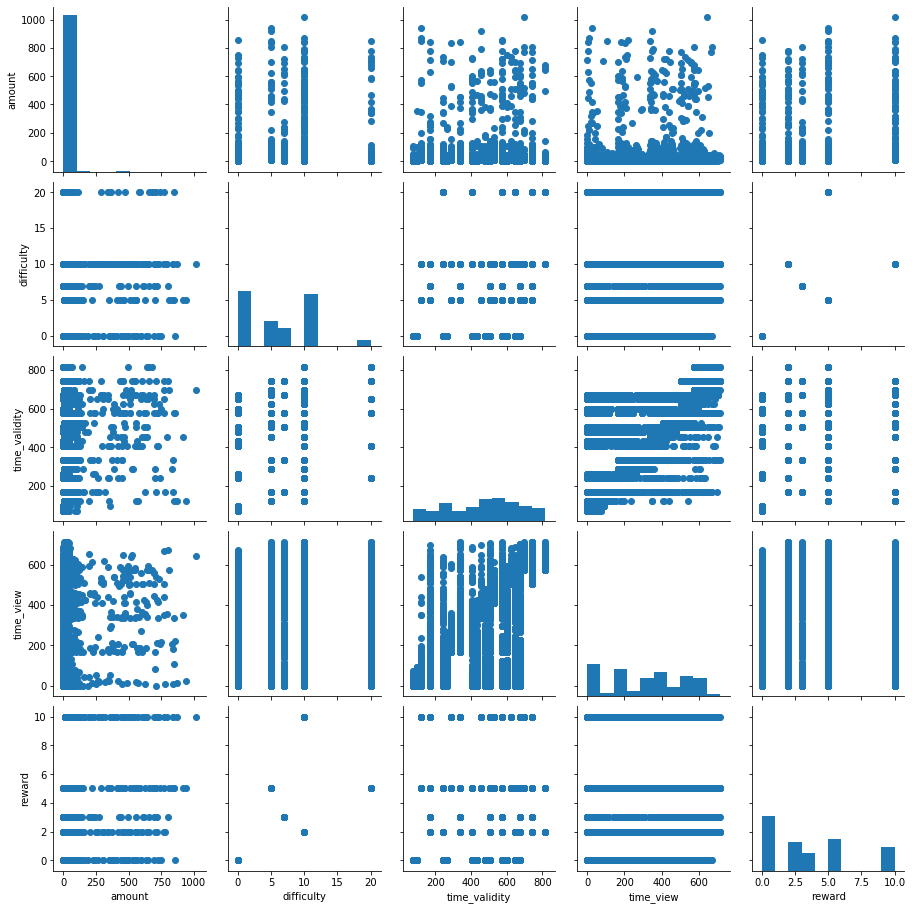

In [323]:
g= sns.PairGrid(data=offer_success, vars=params)
g= g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

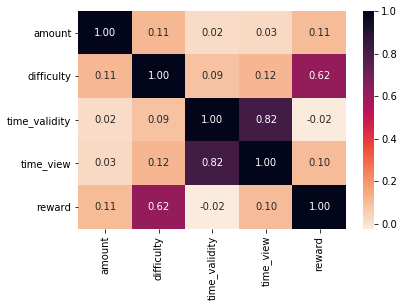

In [321]:
sns.heatmap(offer_success[params].corr(), cmap='rocket_r', annot=True, fmt='0.2f')

## Using ML Models

In [330]:
all_offers_df.isna().sum()

channel_email          0
channel_mobile         0
channel_social         0
channel_web            0
difficulty             0
duration               0
offer_completed        0
offer_id               0
offer_received         0
offer_type             0
offer_view             0
person                 0
reward                 0
time_completed     28785
time_start             0
time_view              0
total                  0
time_validity          0
amount             28785
type                   0
dtype: int64

In [307]:
all_offers_df['offer_view']=all_offers_df['offer_view'].replace(2,1)
all_offers_df['offer_completed']=all_offers_df['offer_completed'].replace(4,1)

In [350]:
all_offers_df['time_view']=all_offers_df['time_view'].fillna(0)

In [443]:
x= all_offers_df.loc[:,['difficulty','duration','offer_id','offer_type','reward'
                        , 'offer_view','offer_completed', 'time_view']]
y= all_offers_df.iloc[:,-1].values

In [444]:
x.head()

,difficulty,duration,offer_id,offer_type,reward,offer_view,offer_completed,time_view
0,5.0,168.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.0,1.0,1.0,6.0
1,5.0,120.0,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5.0,1.0,1.0,0.0
2,10.0,168.0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10.0,1.0,1.0,102.0
3,20.0,240.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5.0,1.0,1.0,30.0
4,10.0,240.0,fafdcd668e3743c1bb461111dcafc2a4,discount,2.0,1.0,1.0,18.0


In [445]:
## Applying Encoding to Categorical Variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3])], remainder='passthrough')

x = np.array(ct.fit_transform(x))


In [446]:
x[1,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
         0.,   0.,   5., 120.,   5.,   1.,   1.,   0.])

In [447]:
## Encoding Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [448]:
print(y)

[1 1 1 ... 0 0 0]


In [454]:
## Splitting into Training and test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [455]:
## Applying Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [472]:
## Train the kernel on training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [477]:
## predicting on training set
y_train_pred= classifier.predict(x_train)

In [478]:
# Forming the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)

[[25535     0]
 [    0 28093]]


1.0

In [473]:
## Predicting on test set
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [474]:
## Forming the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8462    0]
 [   0 9415]]


1.0

In [482]:
### printing the classification report
from sklearn.metrics import classification_report
target_names = ['success','fail']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     success       1.00      1.00      1.00      8462
        fail       1.00      1.00      1.00      9415

    accuracy                           1.00     17877
   macro avg       1.00      1.00      1.00     17877
weighted avg       1.00      1.00      1.00     17877



## Attempt to predict Amount based on offer sent

In [648]:
profile_amount=profile_amount.drop(columns=['amount','became_member_on'])
profile_amount.head()

KeyError: "['amount' 'became_member_on'] not found in axis"

In [649]:
test=pd.merge(all_offers_df,profile_amount, on=['person'], how='left').drop(columns=['channel_email', 'channel_mobile', 
                                                                                'channel_social', 'channel_web',
                                                                                     'time_completed','time_validity'
                                                                                     ,'time_view','total'
                                                                                     ,'time_start','offer_received'
                                                                                     ,'offer_completed', 'person'])

In [650]:
test.dropna(subset=['gender','age','income'], inplace=True)

In [651]:
test['amount']=test['amount'].fillna(0)

In [652]:
test['type']=test['type'].replace('success',1)
test['type']=test['type'].replace('fail',0)

In [654]:
test['Female'] = test['gender'].apply(lambda x: 1 if 'F' in x else 0)
test['Male'] = test['gender'].apply(lambda x: 1 if 'M' in x else 0)
test['Others'] = test['gender'].apply(lambda x: 1 if 'O' in x else 0)

In [657]:
test=test.drop(columns=['gender'])
test.head()

,difficulty,duration,offer_id,offer_type,offer_view,reward,amount,type,age,income,Female,Male,Others
0,5.0,168.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1.0,5.0,19.89,1,75.0,100000.0,1,0,0
1,5.0,120.0,f19421c1d4aa40978ebb69ca19b0e20d,bogo,1.0,5.0,9.54,1,65.0,53000.0,0,1,0
2,10.0,168.0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1.0,10.0,31.05,1,64.0,100000.0,0,1,0
3,20.0,240.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1.0,5.0,339.69,1,88.0,53000.0,1,0,0
4,10.0,240.0,fafdcd668e3743c1bb461111dcafc2a4,discount,1.0,2.0,28.29,1,42.0,69000.0,0,1,0


In [662]:
X=test.loc[:,['difficulty', 'duration', 'offer_id', 'offer_type', 'offer_view',
       'reward', 'type', 'Female','Male','Others', 'age', 'income']]
y=test.iloc[:,6].values

In [663]:
## Applying Encoding to Categorical Variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3])], remainder='passthrough')

X = np.array(ct.fit_transform(X))



In [664]:
np.shape(X)

(62016, 23)

In [667]:
y = y.reshape(len(y),1)

In [668]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()